<a href="https://colab.research.google.com/github/BuiDaoGiaHuy/something/blob/master/Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import cv2
import numpy as np
#import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [92]:
def cal_hist(img_vec):
    hist = np.zeros(256, np.int)
    values, counts = np.unique(img_vec, return_counts=True)
    for i, val in enumerate(values):
        hist[val] = counts[i]
    return hist

In [93]:
def equalizeHist(img):
  img_vec=img.flatten()
  hist=cal_hist(img_vec)
  cdf = np.cumsum(hist)
  cdf_min=cdf[0]
  h = (cdf - cdf_min) / (cdf[-1] - cdf_min) * 255
  h = h.astype(np.int)
  img_eq = img.copy()
  for v in range(256):
    img_eq[img==v] = h[v]
  return img_eq

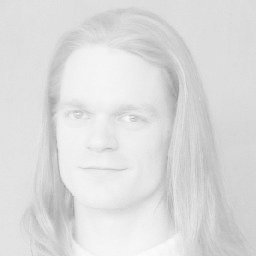

In [94]:
img=cv2.imread('/content/image1.png')
cv2_imshow(img)

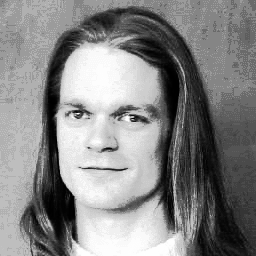

In [95]:
cv2_imshow(equalizeHist(img))

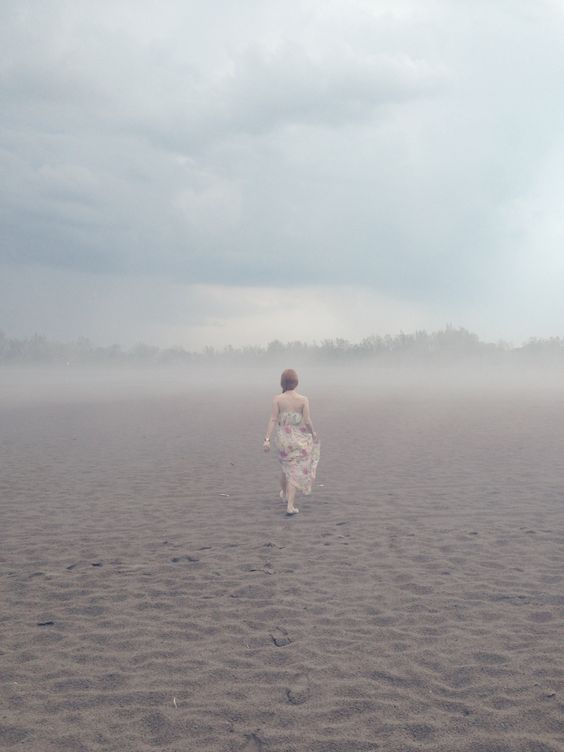

In [96]:
img=cv2.imread('/content/image2.jpg')
cv2_imshow(img)

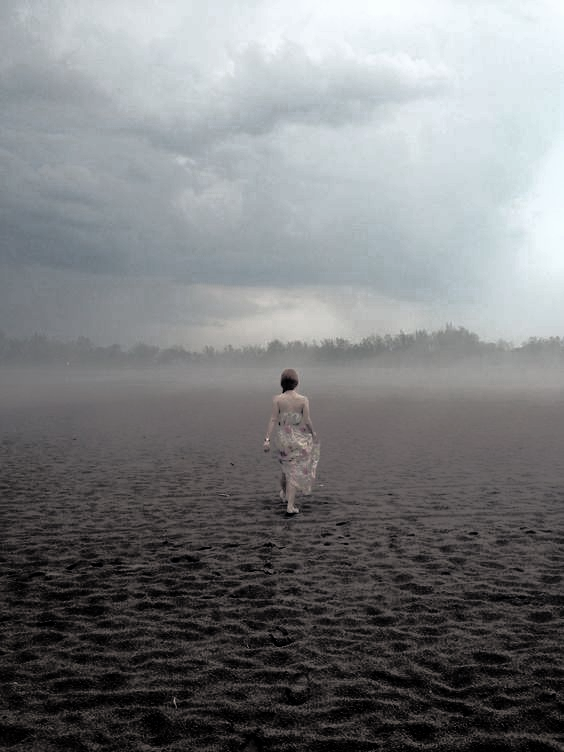

In [97]:
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v=cv2.split(img_hsv)
v=equalizeHist(v)
img_hsv=cv2.merge([h,s,v])
img=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR)
cv2_imshow(img)